In [1]:
import numpy as np
import sys, os, git, lammps_logfile
import warnings
warnings.filterwarnings("ignore")

/home/simon/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso")
from plttools import PltTools
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/improved-input/"
print("data path: ", data_path)

level: level1 & tutorial name: lennard-jones-fluid
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level1/lennard-jones-fluid/improved-input/


In [3]:
time, population1 = np.loadtxt(data_path + "population1vstime.dat").T
time -= time[0]
time *= 0.005
_, population2 = np.loadtxt(data_path + "population2vstime.dat").T
_, coordination = np.loadtxt(data_path + "coordinationnumber12.dat").T

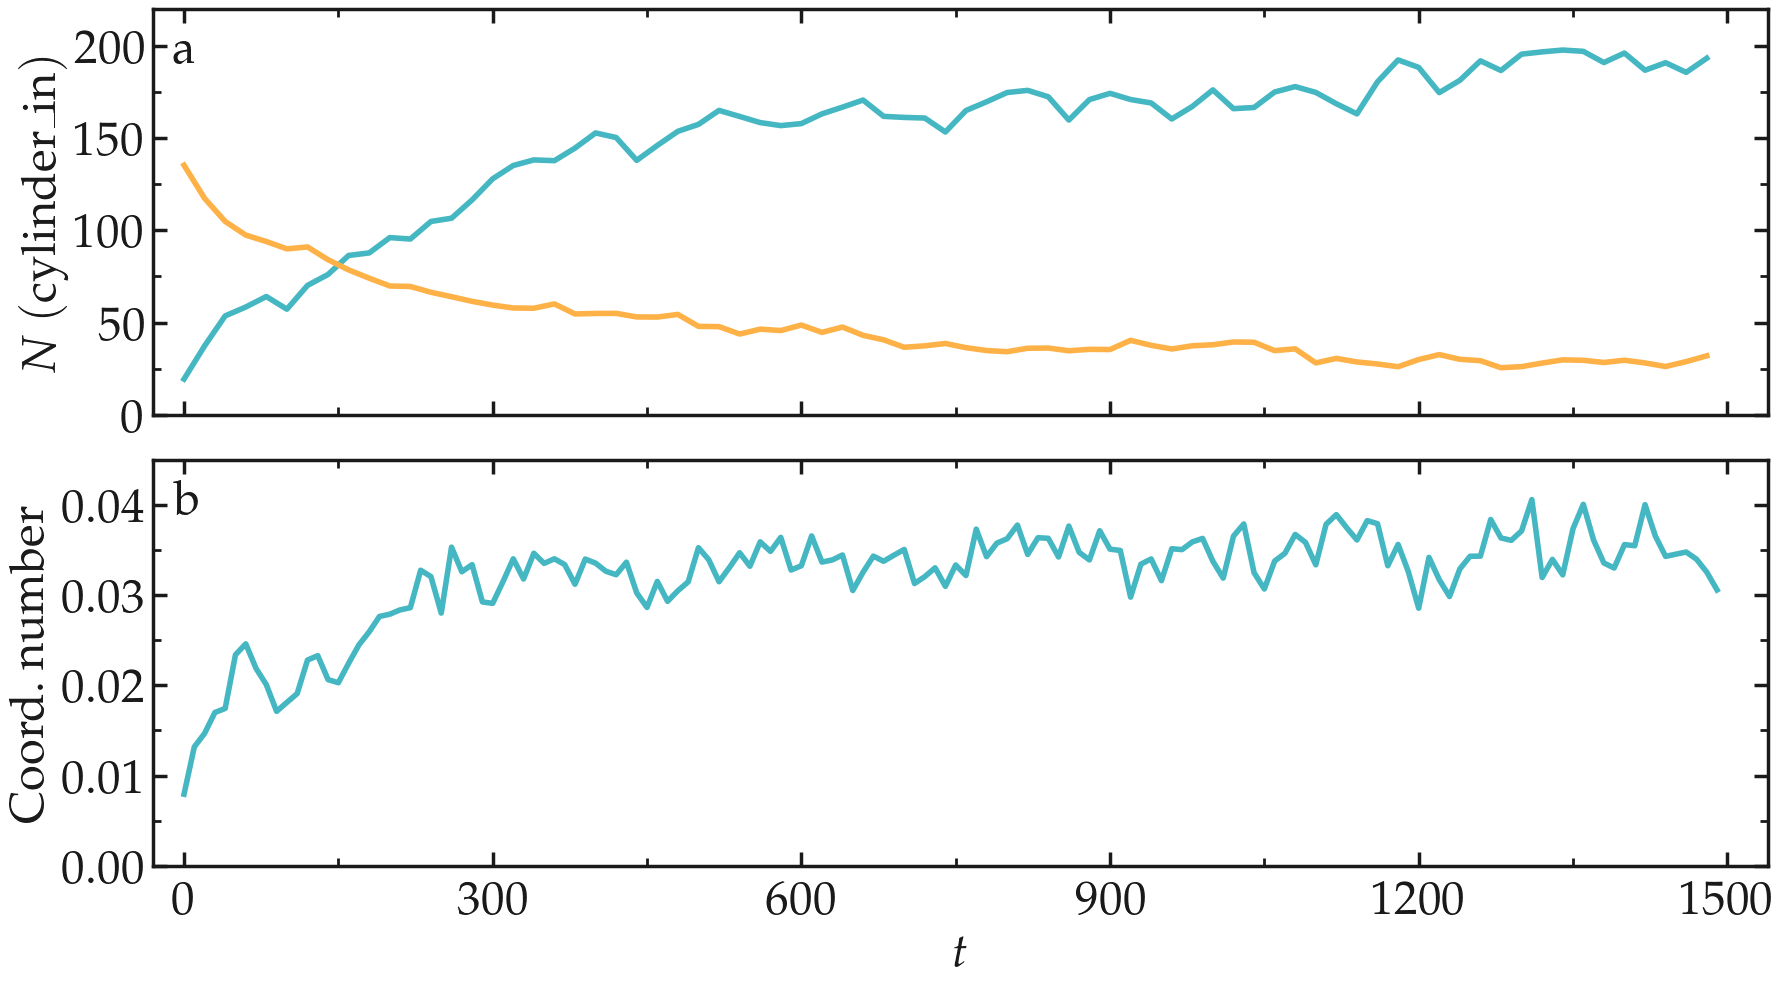

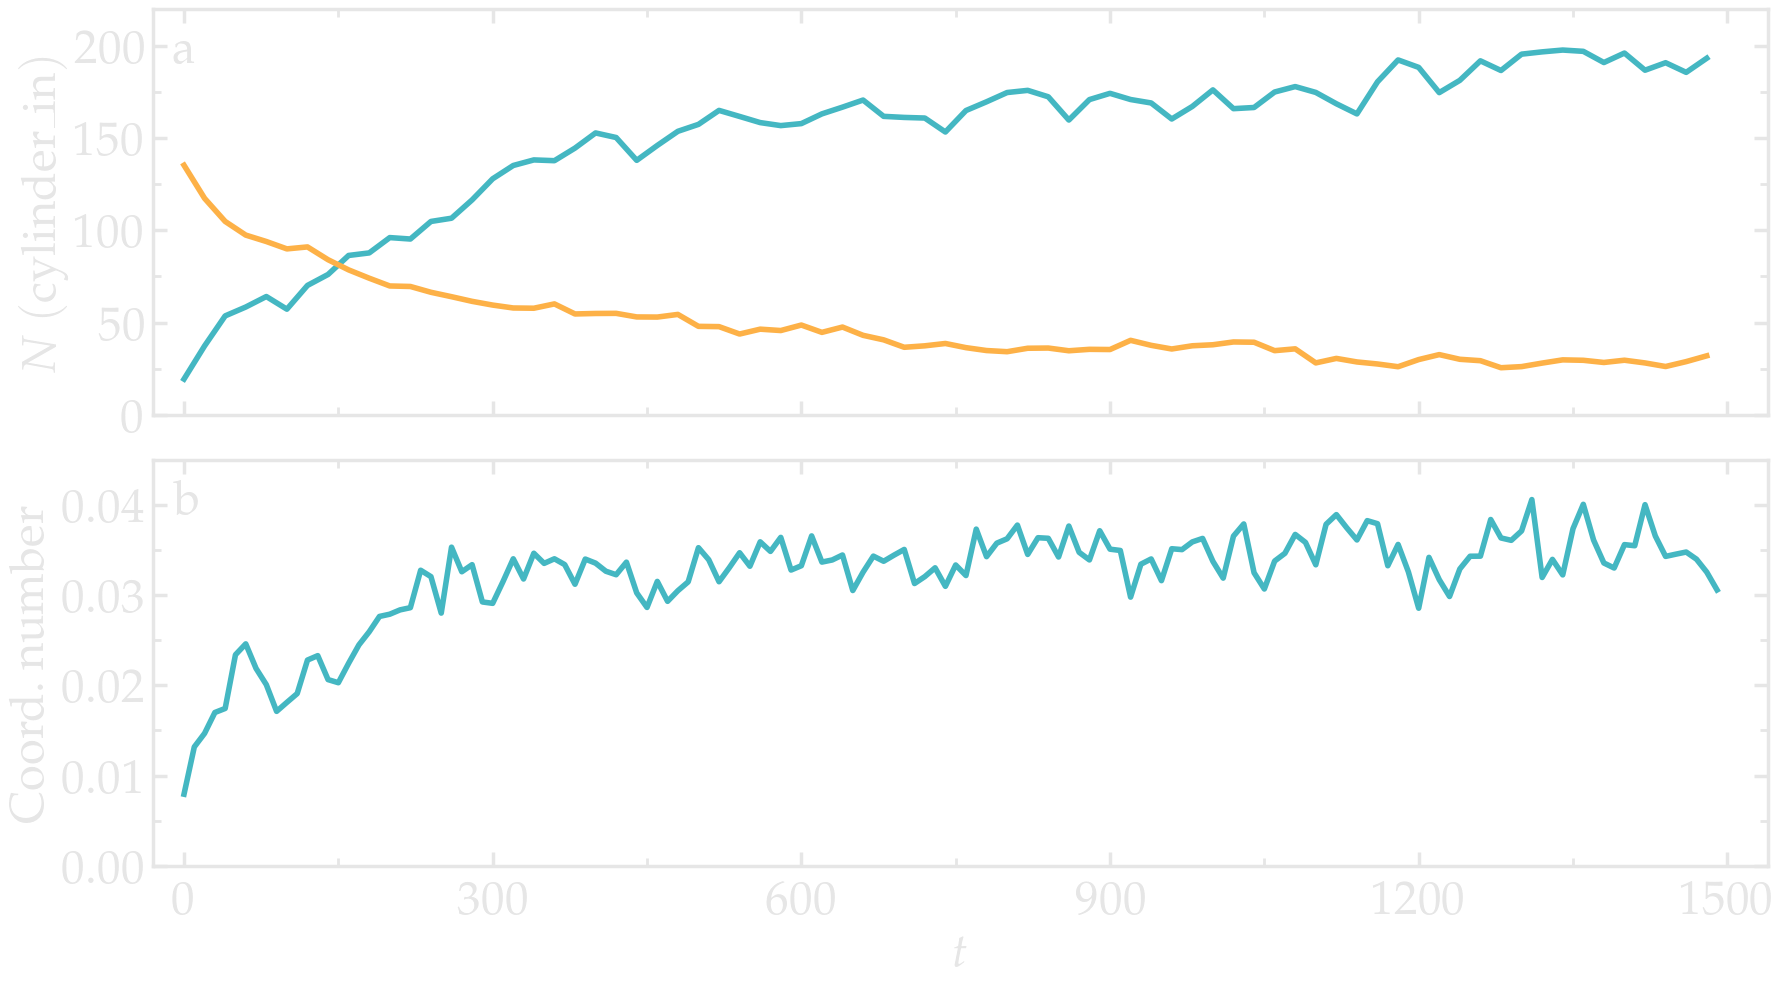

In [4]:
filename = "mixing"
for dark_mode in [False, True]:
    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,10), dark_mode = dark_mode,
                        transparency = True, use_serif=True, n_line=2)
    myplt.add_panel()
    myplt.add_plot(x = time[::2], y =  population1[::2], type = "plot", linewidth_data = 3,
                   marker = "-", data_color = 0, markersize = 12,
                   data_label = r'$E_{12}$')
    myplt.add_plot(x = time[::2], y = population2[::2], type = "plot", linewidth_data = 3,
                   marker = "-", data_color = 1, markersize = 12,
                   data_label = r'$E_{12}$')
    myplt.complete_panel(ylabel = r'$N ~ (\mathrm{cylinder \textunderscore in})$',
                         xlabel = None,
                         xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 1800, 300), x_boundaries=(-30, 1540),
                         y_ticks=np.arange(0, 250, 50), y_boundaries=(0, 220))

    myplt.add_panel()
    myplt.add_plot(x = time, y = coordination, type = "plot", linewidth_data = 3,
                   marker = "-", data_color = 0, markersize = 12,
                   data_label = r'$\mathrm{Energy~Minimization}$')
    myplt.complete_panel(ylabel = r'$\mathrm{Coord. ~ number}$', xlabel = r'$t$',
                         xpad = 10, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_ticks=np.arange(0, 1800, 300), x_boundaries=(-30, 1540),
                   y_ticks=np.arange(0, 0.05, 0.01), y_boundaries=(0.0, 0.045))
    myplt.add_subplotlabels()
    myplt.save_figure(filename = filename, saving_path = './')

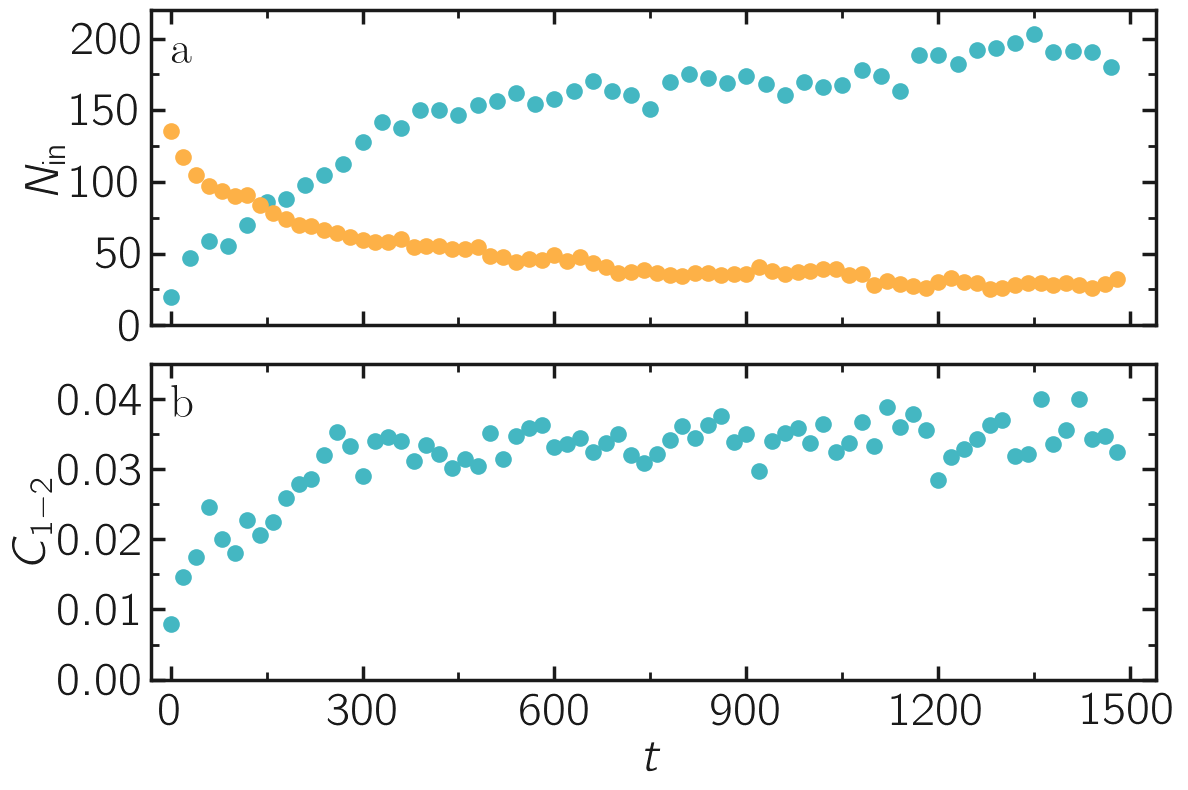

In [20]:
filename = "mixing-article"
dark_mode = False
myplt = PltTools()
myplt.prepare_figure(fig_size = (12,8), dark_mode = dark_mode,
                    transparency = False, use_serif=False, n_line=2)
myplt.add_panel()
myplt.add_plot(x = time[::3], y =  population1[::3], type = "plot", linewidth_data = 3,
                marker = "o", data_color = 0, markersize = 12,
                data_label = r'$E_{12}$')
myplt.add_plot(x = time[::2], y = population2[::2], type = "plot", linewidth_data = 3,
                marker = "o", data_color = 1, markersize = 12,
                data_label = r'$E_{12}$')
myplt.complete_panel(ylabel = r'$N_\mathrm{in}$',
                        xlabel = None,
                        xpad = 10, legend=False, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 1800, 300), x_boundaries=(-30, 1540),
                        y_ticks=np.arange(0, 250, 50), y_boundaries=(0, 220))

myplt.add_panel()
myplt.add_plot(x = time[::2], y = coordination[::2], type = "plot", linewidth_data = 3,
                marker = "o", data_color = 0, markersize = 12,
                data_label = r'$\mathrm{Energy~Minimization}$')
myplt.complete_panel(ylabel = r'$C_{1-2}$', xlabel = r'$t$',
                        xpad = 10, legend=False, handlelength_legend=1)
myplt.set_boundaries(x_ticks=np.arange(0, 1800, 300), x_boundaries=(-30, 1540),
                y_ticks=np.arange(0, 0.05, 0.01), y_boundaries=(0.0, 0.045))
myplt.add_subplotlabels()
myplt.save_figure(filename = filename, saving_path = './')